## Turial 0 : Bring Your Own Graphs

### Mathematical definition of graphs

A graph is a structure amounting to a set of objects where some objects are "related."
The objects are often referred to as 'nodes' (or vertices), and the related pairs of vertices refer to as 'edges' (or lines).
Mathematically speaking, there's no one unified framework for describing the graph. In this series of tutorials, we represent a graph as a tuple:

$$\mathcal{G}=<V,A>$$

where the $V$ is the set of vertices, and $A$ is the adjacency matrix. The columns and rows indicate nodes. If the value of $A_{ij}$ is 1.0, then the edge exists between two nodes $i,j$. For the undirected graphs, the adjacent $A$ is symmetric.

We can expand this setup to the directed graphs where the edges are directed. Depending on the edge's direction, the source node is the node where the edge starts from, and the destination node is the node where the edge reaches. In the directed graphs, the adjacent matrix $A$ can be asymmetric.

Note that the index of nodes (and the edges) are arbitrary. This property becomes important in the computational process of GNN, namely permutations invariance.

## Instantiating a graph in python

In python, we have a couple of ways to build graphs. We focus on `networkx` and `dgl` for this purpose.

`networkx` is one of the basic packages for handling graph format data in python. Hence almost every major graph-related packages have an interface to convert
a framework-specific graph to the `networkx` equivalent one.

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

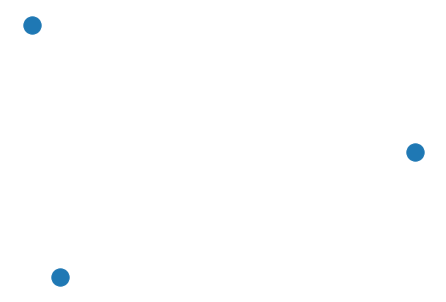

In [14]:
G = nx.Graph() # instantiate an empty container for handling graph
G.add_node(1) # Add node in the graph
G.add_node(2) # Add node in the graph
G.add_node(3) # Add node in the graph

nx.draw(G)

let's add some edges to the graph `G`

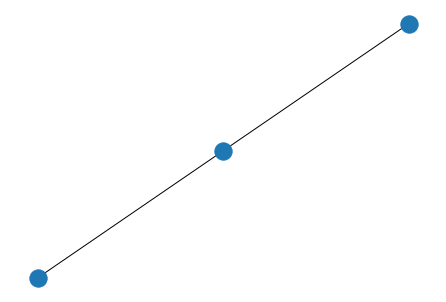

In [20]:
G.add_edge(1,2)
G.add_edge(2,3)
nx.draw(G)

## DGL as a computational framework over graphs

Even though `networkx` supports a unified way for handling graphs in python, it is not friendly with the computations. This section mathematically defines the attributed graphs where the nodes (or/and) edges have the attributes and handling such attributed graphs in `dgl`.

The attributed graph $\mathcal{G}$ is often defined as follows:
$$\mathcal{G} = <V, E>$$

where the $V$ is the **set** of node-related features (node features), and $E$ is the **set** of edge-related features (edge features). Assume the adjacency matrix $A$ is defined implicitly.

We often assume all the node features for all nodes have the same feature dimensions for the simplicity of computations. Similarly, we put the same assumption on the edge features. 

In practice, we achieve such assumptions easily. In some applications, different nodes may be of different types. As a result, different nodes may have different input features. However, by appending some proper dimensional vectors in the front or last, we can treat them to be the same dimensional vectors.

Let's instanitate an attributed graph with `dgl`.

In [29]:
import dgl
import torch

In [30]:
# edges 0->1, 0->2, 0->3, 1->3
u, v = torch.tensor([0, 0, 0, 1]), torch.tensor([1, 2, 3, 3])
g = dgl.graph((u, v))
print(g) # number of nodes are inferred from the max node IDs in the given edges

Graph(num_nodes=4, num_edges=4,
      ndata_schemes={}
      edata_schemes={})


There are a few possible ways for generating graph through `dgl`.
The above example is a case where we generate the graph by specifying the edges only.
In this case, `dgl` automatically infers how many nodes will be.

If you want to specify the number of nodes, then you can also do the following.

In [31]:
g = dgl.graph((u, v), num_nodes=8) # the same edge connectivities but have 8 nodes
print(g)

Graph(num_nodes=8, num_edges=4,
      ndata_schemes={}
      edata_schemes={})


## Adding features on the `dgl.graph`

One attractive feature of the dgl graph (actually the same for the `networkx`) is to allow users to add arbitrary `vector-represented` features on the nodes and edges. Let's add some feature vectors on the graphs.

In [32]:
node_feat_dim = 7 # the node feature dim
edge_feat_dim = 3 # the edge feature dim

In [36]:
g.ndata['feat'] = torch.randn(g.number_of_nodes(), node_feat_dim)
g.edata['feat'] = torch.randn(g.number_of_edges(), edge_feat_dim)
print(g)

Graph(num_nodes=8, num_edges=4,
      ndata_schemes={'feat': Scheme(shape=(7,), dtype=torch.float32)}
      edata_schemes={'feat': Scheme(shape=(3,), dtype=torch.float32)})
